![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

# Exercises
## The Sakila Database

One of the best example databases out there is the <a href="https://dev.mysql.com/doc/sakila/en/">Sakila Database</a>, which was originally created by MySQL and has been open sourced under the terms of the BSD License.

The Sakila database is a nicely normalised schema modelling a DVD rental store, featuring things like films, actors, film-actor relationships, and a central inventory table that connects films, stores, and rentals.

<img width="1200px" src="https://user-images.githubusercontent.com/7065401/58504872-fa243b00-8161-11e9-85ed-4b7d8d7ce9f7.png" />

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Hands on! 

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

%matplotlib inline

In [129]:
conn = sqlite3.connect('data/sakila.db')

df = pd.read_sql('''
    SELECT
        rental.rental_id, rental.rental_date, rental.return_date,
        customer.last_name AS customer_lastname,
        store.store_id,
        city.city AS rental_store_city,
        film.title AS film_title, film.rental_duration AS film_rental_duration,
        film.rental_rate AS film_rental_rate, film.replacement_cost AS film_replacement_cost,
        film.rating AS film_rating
    FROM rental
    INNER JOIN customer ON rental.customer_id == customer.customer_id
    INNER JOIN inventory ON rental.inventory_id == inventory.inventory_id
    INNER JOIN store ON inventory.store_id == store.store_id
    INNER JOIN address ON store.address_id == address.address_id
    INNER JOIN city ON address.city_id == city.city_id
    INNER JOIN film ON inventory.film_id == film.film_id
    ;
''', conn, index_col='rental_id', parse_dates=['rental_date', 'return_date'])

In [130]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What's the mean of `film_rental_duration`?

In [131]:
# your code goes here
df['film_rental_duration'].mean()

4.935489902767389

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What's the most common rental duration?

Show a <b>bar plot</b> with all the durations.

In [132]:
# your code goes here
df['film_rental_duration'].mode()

0    3
Name: film_rental_duration, dtype: int64

<Axes: >

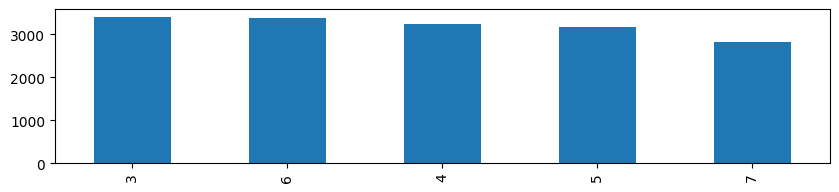

In [133]:
df['film_rental_duration'].value_counts().plot(kind="bar", figsize=(10,2))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What is the most common rental rate?

- Show a <b>pie plot</b> with all possible rental rates.
- Show a <b>bar plot</b> with all possible rental rates.
- Which plot you think fits the best in this case? Why?

In [134]:
# your code goes here
df['film_rental_rate'].mode()

0    0.99
Name: film_rental_rate, dtype: float64

<Axes: ylabel='film_rental_rate'>

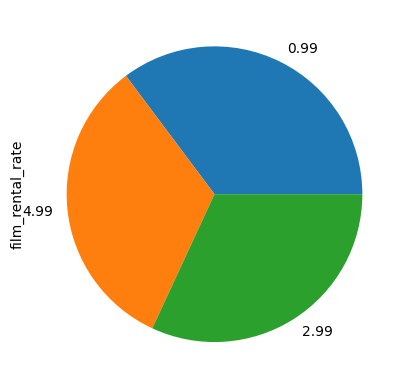

In [135]:
# your code goes here
rates = df['film_rental_rate'].value_counts()
rates.plot(kind="pie")

<Axes: >

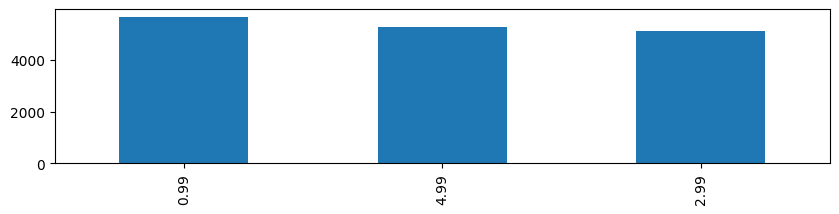

In [136]:
rates.plot(kind="bar", figsize=(10,2))

Bar plot is better in this case because you can visually see the tallest bar more easily than the largest pie slice.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How is the replacement cost distributed?

- Show a <b>box plot</b> of the replacement costs.
- Show a <b>density plot</b> of the replacement costs.
- Add a red line on the <b>mean</b>.
- Add a green line on the median <b>median</b>.

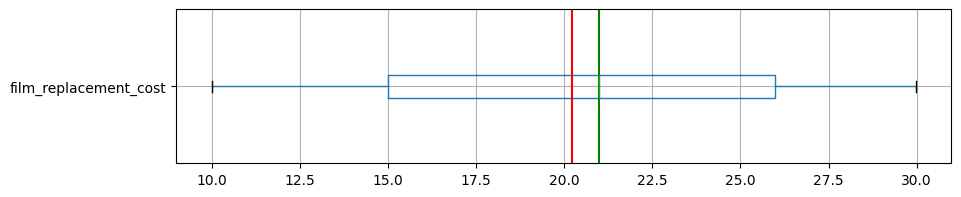

In [137]:
# your code goes here
costs = df['film_replacement_cost']
mean = costs.mean()
median = costs.median()
plot = df.boxplot(column='film_replacement_cost', vert=False, figsize=(10,2))
plot.axvline(mean, color='red')
plot.axvline(median, color='green')

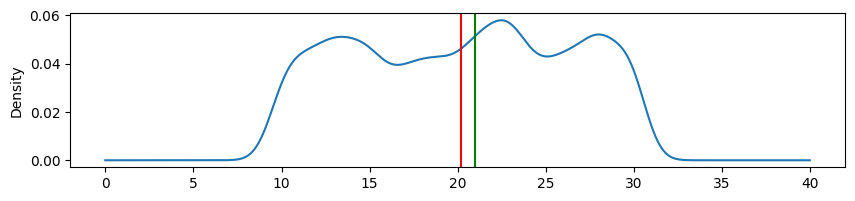

In [138]:
# your code goes here
kde = costs.plot(kind="kde", figsize=(10,2))
kde.axvline(mean, color='red')
kde.axvline(median, color='green')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many films of each rating do we have?

- Show the raw count of each film rating.
- Show a <b>bar plot</b> with all possible film ratings.

In [139]:
# your code goes here
ratings = df['film_rating'].value_counts()
ratings

PG-13    3585
NC-17    3293
PG       3212
R        3181
G        2773
Name: film_rating, dtype: int64

<Axes: >

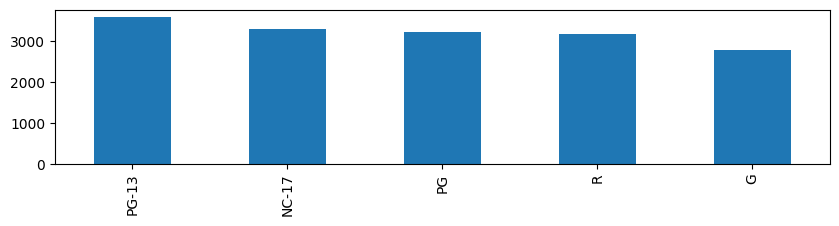

In [140]:
# your code goes here
ratings.plot(kind="bar", figsize=(10,2))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Does the film replacement cost vary depending on film rating?

In the United States, film classification is a voluntary process with the ratings issued by the Motion Picture Association of America (MPAA) via the Classification and Rating Administration (CARA).

- G (General Audiences): All Ages are Admitted.
- PG (Parental Guidance Suggested): Some Material May Not Be Suitable for Children.
- PG-13 (Parents Strongly Cautioned): Some Material May Be Inappropriate for Children Under 13.
- R (Restricted): Under 17 Requires Accompanying Parent or Adult Guardian.
- NC-17 (Adults Only): No One 17 and Under Admitted.

Show a <b>grouped box plot</b> per film rating with the film replacement costs.

<Axes: title={'center': 'film_replacement_cost'}, xlabel='film_rating'>

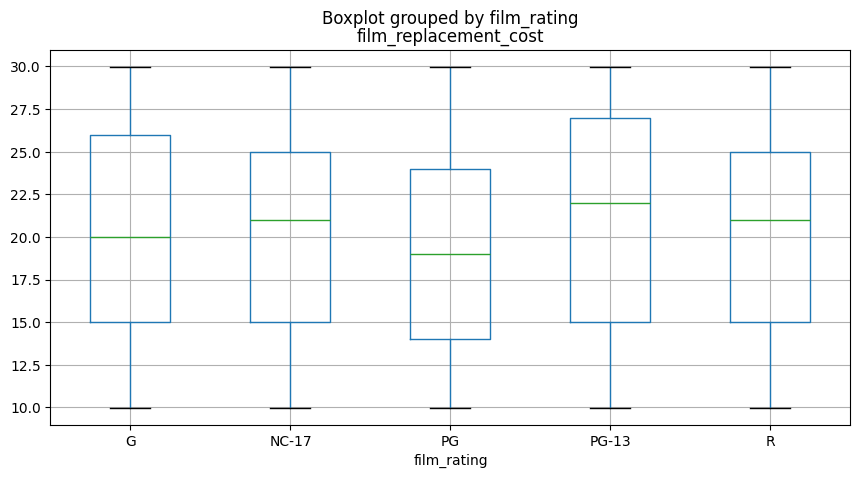

In [141]:
df.boxplot(by='film_rating', column='film_replacement_cost', figsize=(10,5))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Add and calculate a new `rental_days` column

This numeric column should have the count of days between `rental_date` and `return_date`.

In [160]:
# your code goes here
# note my answer rounds down to nearest days
df['rental_days'] = (df['return_date'] - df['rental_date']).dt.days

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Analyze the distribution of `rental_days`

- Calculate the mean of `rental_days`.
- Show a <b>density (KDE)</b> of `rental_days`.

In [159]:
# your code goes here
df['rental_days'].mean()

4.525944139713763

<Axes: ylabel='Density'>

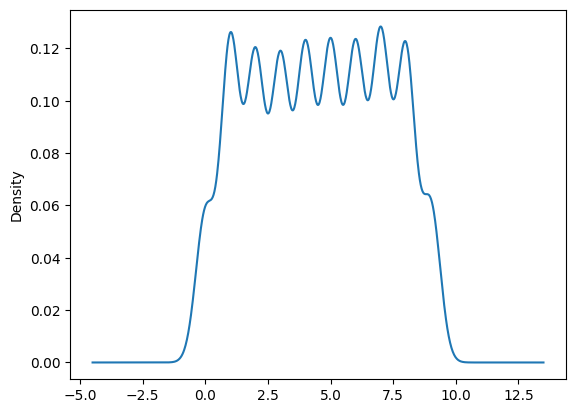

In [161]:
# your code goes here
df['rental_days'].plot(kind="kde")

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Add and calculate a new `film_daily_rental_rate` column

This value should be the division of `film_rental_rate` by `film_rental_duration`.

In [ ]:
# your code goes here
df['film_daily_rental_rate'] = df['film_rental_rate'] / df['film_rental_duration']
# df[['film_rental_rate', 'film_rental_duration', 'film_daily_rental_rate']]

,film_rental_rate,film_rental_duration,film_daily_rental_rate
rental_id,,,
1,2.99,7,0.427143
2,2.99,7,0.427143
3,2.99,7,0.427143
4,0.99,6,0.165000
5,2.99,5,0.598000
...,...,...,...
16045,0.99,5,0.198000
16046,0.99,6,0.165000
16047,0.99,4,0.247500


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Analyze the distribution of `film_daily_rental_rate`

- Calculate the mean of `film_daily_rental_rate`.
- Show a <b>density (KDE)</b> of `film_daily_rental_rate`.

In [169]:
# your code goes here
df['film_daily_rental_rate'].mean()

0.6458262471655329

<Axes: ylabel='Density'>

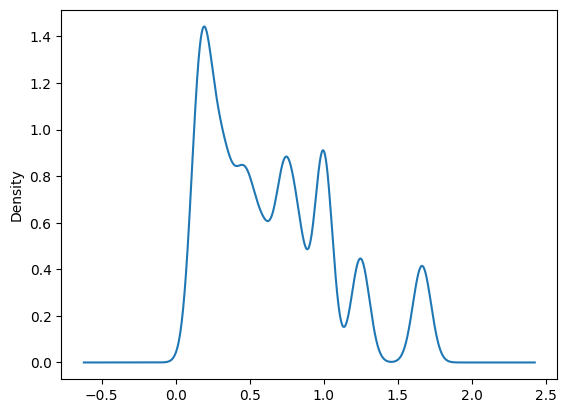

In [170]:
# your code goes here
df['film_daily_rental_rate'].plot(kind="kde")

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### List 10 films with the lowest daily rental rate

In [174]:
# your code goes here
df.nsmallest(10, 'film_daily_rental_rate')['film_title']

rental_id
18               ROMAN PUNK
37      BORROWERS BEDAZZLED
48               GUN BONNIE
74             GREEDY ROOTS
76           PATIENT SISTER
87              GANDHI KWAI
117     VALENTINE VANISHING
133     BORROWERS BEDAZZLED
148    UNFORGIVEN ZOOLANDER
158             LIGHTS DEER
Name: film_title, dtype: object

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### List 10 films with the highest daily rental rate

In [175]:
# your code goes here
df.nlargest(10, 'film_daily_rental_rate')['film_title']

rental_id
13          KING EVOLUTION
40            MINDS TRUMAN
68             TEEN APOLLO
106              SHOW LORD
116              WIFE TURN
124    BACKLASH UNDEFEATED
135        AMERICAN CIRCUS
152    MIDSUMMER GROUNDHOG
155       BEHAVIOR RUNAWAY
163          KISSING DOLLS
Name: film_title, dtype: object

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many rentals were made in Lethbridge city?

In [183]:
# your code goes here
df.loc[df['rental_store_city']=='Lethbridge'].shape[0]

7923

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many rentals of each film rating were made in Lethbridge city?

Show a <b>bar plot</b> with each film rating count.

<Axes: >

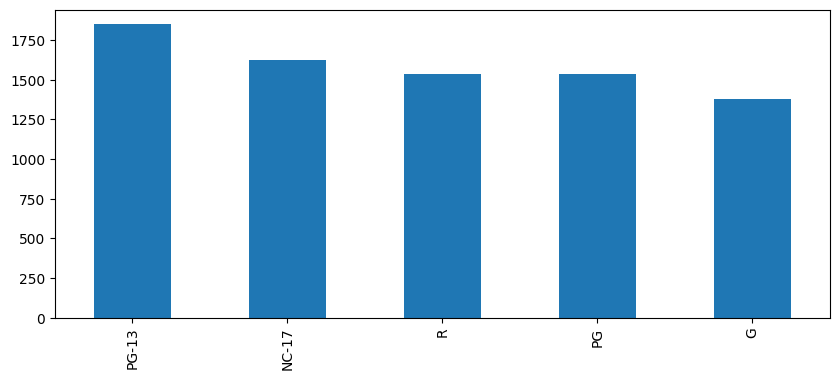

In [196]:
# your code goes here
df.loc[df['rental_store_city']=='Lethbridge']['film_rating'].value_counts().plot(kind='bar', figsize=(10,4))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many rentals were made in Woodridge city with rental duration higher than 5 days?

In [199]:
# your code goes here
df[(df['rental_store_city']=='Woodridge') & (df['film_rental_duration']>5)].shape[0]

3186

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many rentals were made at the store with id 2 or with replacement cost lower than 10.99 USD?

In [201]:
# your code goes here
df[(df['store_id']==2) | (df['film_replacement_cost']<10.99)].shape[0]

8444

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)